## Solar Panel Annotation Tool

#### Import Python libraries

In [1]:
from pigeon import annotate
from rasterio.plot import show
import rasterio as rio
import os, json
import random
import numpy as np

# from IPython.display import display, Image
# import ipywidgets as widgets
# from skimage import io
# import matplotlib as mpl
# import matplotlib.pyplot as plt

In [2]:
def get_annotation_log():
    annotated_files = []
    with open(os.path.join(tile_path, log_file)) as json_file:
        data = json.load(json_file)
    n = len(data['data'])
    print(f'There were {n} previous annotations found')
    for elem in data['data']:
        annotated_files.append(elem['file'])
    return annotated_files, data

In [3]:
def identify_not_annotated(flag=False):
    all_tiles = [tile for tile in os.listdir(tile_path) if tile.__contains__('.tif')]
    if flag:
        already_annotated, json_record = get_annotation_log()
        return ([file for file in all_tiles if os.path.join(tile_path, file) not in already_annotated and not file.__contains__('.txt')], json_record)
    else:
        return all_tiles, {}

In [4]:
def write_annotation_log(annots, record):
    new_dict = {}
    new_dict['data'] = []
    data = []
    
    for annot in annots:
        data.append({'file': annot[0], 'annotation': annot[1]})

    if len(record) > 0:
        print(f'Appending {len(annots)} new annotations to existing log file')
        record['data'] += data
        with open(os.path.join(tile_path, log_file), 'w') as outfile:
            json.dump(record, outfile)
    else:
        print(f'Writing {len(annots)} new annotations to new log file')
        new_dict['data'] = data
        with open(os.path.join(tile_path, log_file), 'w') as outfile:
            json.dump(new_dict, outfile)

## File and Path Initiation

#### Specify folder path on your local drive (after unzipping)

In [ ]:
'D:\Raster\HRO\parsed_ortho_files\cape_may_nj_0.3m_tiles\e22c11_3400-2700.tif'

In [7]:
tile_path = r'C:\Users\kenns\automatic_solar_pv_detection\images\val_audit'
log_file = "annotations.json"

In [8]:
if os.path.exists(os.path.join(tile_path, log_file)):
    need_annotations, json_record = identify_not_annotated(True)
    print(f"{len(need_annotations)} files need annotations")
else:
    need_annotations, json_record = identify_not_annotated(False)
    print(f"No log file created yet, {len(need_annotations)} files need annotations")

No log file created yet, 100 files need annotations


#### Specify a % of the sample to annotate this session (in decimal value)

In [9]:
p = float(input("What percentage of files would you like to sample today (e.g. .1 for 10%)?"))

What percentage of files would you like to sample today (e.g. .1 for 10%)?1


#### Grabs a random sample of specified size

In [10]:
random_files = np.random.choice(need_annotations, int(len(need_annotations)*p), replace=False)
# random_files = np.random.choice(need_annotations, 100)
samples_to_annotate = [os.path.join(tile_path, file) for file in random_files]

In [11]:
samples_to_annotate = [os.path.join(tile_path, file) for file in os.listdir(tile_path) if file.__contains__('tif')]

In [12]:
print(f'Staging annotation for {len(samples_to_annotate)} files')

Staging annotation for 100 files


## Main annotation widget - choose between [yes, no, maybe]

In [13]:
annotations = annotate(
  samples_to_annotate,
  options=['yes', 'no', 'maybe'],
    display_fn=lambda filename: show(rio.open(filename))
)

HTML(value='0 examples annotated, 101 examples left')

Output()

#### View a specific annotation by index, or view a range

In [34]:
annotations[-5:]

[('C:\\Users\\kenns\\automatic_solar_pv_detection\\images\\to_audit\\11smt575815_400-4800.tif',
  'no'),
 ('C:\\Users\\kenns\\automatic_solar_pv_detection\\images\\to_audit\\11smt560785_4200-3500.tif',
  'no'),
 ('C:\\Users\\kenns\\automatic_solar_pv_detection\\images\\to_audit\\11smt620800_300-1000.tif',
  'no'),
 ('C:\\Users\\kenns\\automatic_solar_pv_detection\\images\\to_audit\\11smt575725_3500-3900.tif',
  'no'),
 ('C:\\Users\\kenns\\automatic_solar_pv_detection\\images\\to_audit\\11smt665740_3400-2300.tif',
  'no')]

In [ ]:
"""
yes
'C:\\Users\\kenns\\automatic_solar_pv_detection\\images\\to_audit\\11smt680830_700-1100.tif'

"""

#### You can use this cell to update the classification in case of an error

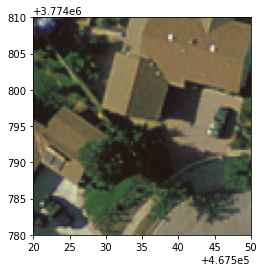

<AxesSubplot:>

In [35]:
test_img = rio.open('C:\\Users\\kenns\\automatic_solar_pv_detection\\images\\to_audit\\11smt665740_3400-2300.tif')
show(test_img)

In [41]:
# # images to update to 'yes'
# tifs_to_update = ["10seg895850_4600-4100.tif", "10seg895790_1200-1300.tif", "10seg895790_3200-2700.tif", "10seg850895_2400-2400.tif"]
# tifs_to_update = [os.path.join(tile_path, tif) for tif in tifs_to_update]

In [42]:
# to_update = '10seg745880_500-2100.tif'
# for annot in annotations:
#     if annot[0] in tifs_to_update:
#         print(f'{annot[0]} changed to yes')
#         annot = (os.path.join(tile_path, annot[0]), 'yes')

In [61]:
len(annotations)

1743

In [62]:
# for annot in annotations:
#     if annot[0] == os.path.join(tile_path, '10seg925775_1700-2900.tif'):
# #         print('maybe')
#         annot = (os.path.join(tile_path, '10seg925775_1700-2900.tif'), 'maybe')
#     elif annot[0] == os.path.join(tile_path, '10seg850865_4800-2700.tif'):
# #     elif annot[0] in [os.path.join(tile_path, '10seg940745_1500-4400.tif'),os.path.join(tile_path, '10seg850880_4100-4900.tif')]:
#         print('yes')
#         annot = (os.path.join(tile_path, '10seg880790_2800-0.tif'), 'yes')

In [36]:
for annot in annotations:
    if annot[0] == 'C:\\Users\\kenns\\automatic_solar_pv_detection\\images\\to_audit\\11smt680830_700-1100.tif':
        annot = ('C:\\Users\\kenns\\automatic_solar_pv_detection\\images\\to_audit\\11smt680830_700-1100.tif', 'yes')

## Write annotations to JSON log file

In [12]:
write_annotation_log(annotations, json_record)

Appending 100 new annotations to existing log file


#### After annotating, you can use this to get a summary by class

In [38]:
with open(os.path.join(tile_path, 'annotations.json'), 'r') as in_file:
    data = json.load(in_file)

In [39]:
data['data'][0]

{'file': 'C:\\Users\\kenns\\automatic_solar_pv_detection\\images\\to_audit\\11smt590770_3800-3500.tif',
 'annotation': 'no'}

In [40]:
count_dict = {'yes': 0, 'no': 0, 'maybe': 0}
for row in data['data']:
    count_dict[row['annotation']] += 1

In [41]:
count_dict

{'yes': 11, 'no': 748, 'maybe': 11}

### >>> You can ignore everything below here <<<

#### Attempt at manually building annotator with .ipynb widgets

In [19]:
# tile_annotations = []
# current_file = ""

In [22]:
# def yes_clicked(_):
#     with out:
#         clear_output()
#         tile_annotations.append([current_file, 1])

In [23]:
# def no_clicked(_):
#     with out:
#         clear_output()
#         tile_annotations.append([current_file, 0])        

In [30]:
# for sample in samples_to_annotate:
#     current_file = sample
#     show(sample)
#     yes_button = widgets.Button(description="Has Solar")
#     no_button = widgets.Button(description="No Solar")
#     out = widgets.Output()
#     yes_button.on_click(yes_clicked)
#     no_button.on_click()
#     widgets.VBox([yes_button, no_button, out])